<a href="https://colab.research.google.com/github/fedhere/RubinRhapsodies/blob/main/rubin_rhapsodies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubin Rhapsodies $^{TM}$

In [11]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
import os

In [2]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Data Import

In [6]:
cd gdrive/Shareddrives/

/content/gdrive/Shareddrives


In [7]:
cd FASTlab/rubin_rhapsodies

/content/gdrive/Shareddrives/FASTlab/rubin_rhapsodies


In [8]:
#!mkdir rubin_rhapsodies # there should be no need to do this: its already there

In [9]:
#cd rubin_rhapsodies/ # there should be no need to do this: its already there

In [25]:
#import data only if not there
#save into data
if not os.path.isfile("data/plasticc_train_metadata.csv.gz"):
  os.system("wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz")
  if not os.path.isdir("data"):
    os.system("mkdir data")
  os.system("mv plasticc_train_metadata.csv.gz data")

if not os.path.isfile("data/plasticc_train_lightcurves.csv.gz"):
  os.system("wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz")
  if not os.path.isdir("data"):
    os.system("mkdir data")
  os.system("mv plasticc_train_lightcurves.csv.gz data")


In [26]:
ls data

plasticc_train_lightcurves.csv.gz  plasticc_train_metadata.csv.gz


In [27]:
lcvs = pd.read_csv("data/plasticc_train_lightcurves.csv.gz")
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [28]:
metadata = pd.read_csv("data/plasticc_train_metadata.csv.gz")
metadata.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,1,0.301,40.969,-0.004,257.7,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,1,0.193,39.866,-0.002,-368.8,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [30]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


## Visualization

In [31]:
# preparing a normalization to pass to the color map to map red filters to red blue filters to blue
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

In [71]:
skip = 400
N = int(objects.shape[0] / skip)
N

19

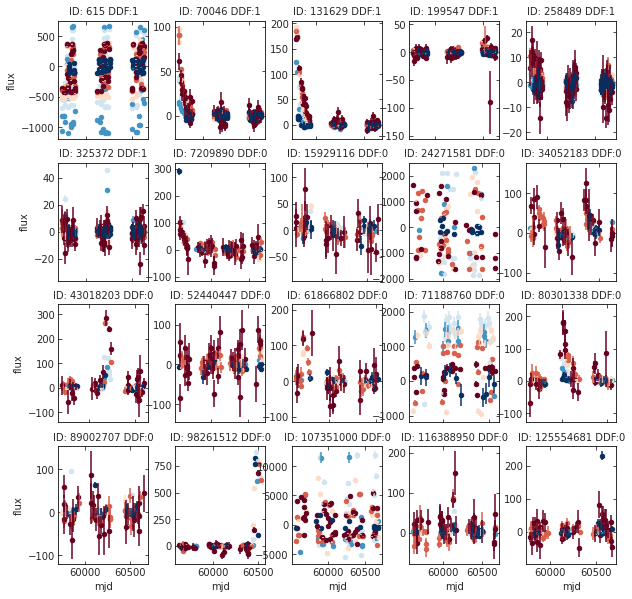

In [82]:
#Plotting every 500th object
plt.rcParams["font.size"] = 10
fig, axs = plt.subplots(int(N/5) + 1, 5, figsize=(10,10))
fig.subplots_adjust(wspace=0.3)
for i,obj in enumerate(objects[::skip]):
  #print(i, int(i/5), i%5)
  ax = axs[int(i/5), i%5]
  #ax = plt.figure().add_subplot(111)
  for band in bands:
    lcvs[(lcvs.object_id == obj) & (lcvs.passband == band)].plot(x="mjd", 
                                                y="flux", yerr="flux_err", ax=ax, kind="scatter", 
                                                                color=plt.cm.RdBu_r(norm_band(band)))
  ax.set_title("ID: %d DDF:%d"%(obj, metadata[metadata.object_id == obj].ddf_bool), fontsize=10)
  if int(i/5) < int(N/5):
    ax.set_xticklabels([])
    ax.set_xlabel("")
  if i%5:
     ax.set_ylabel("")

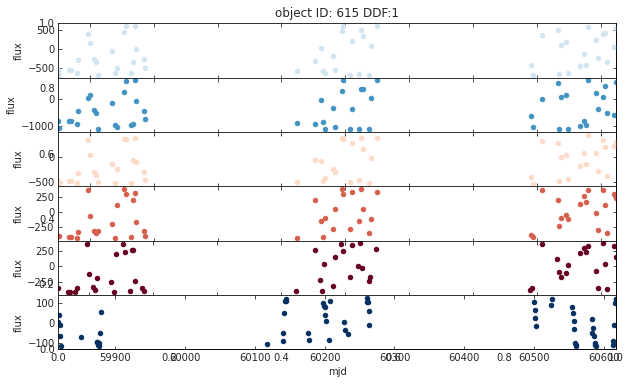

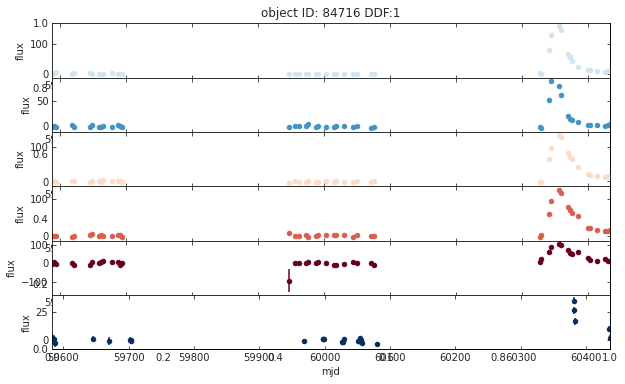

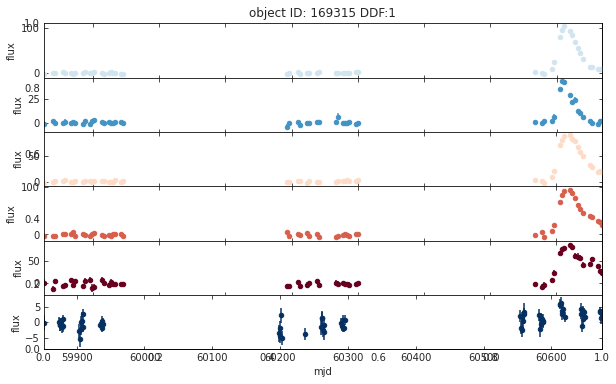

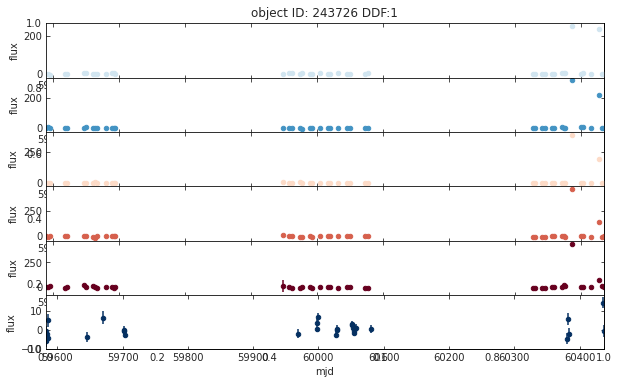

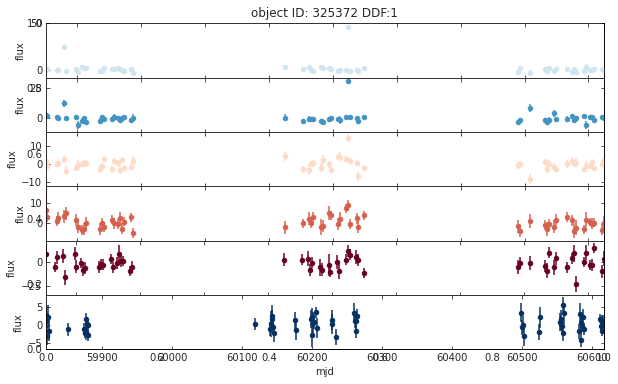

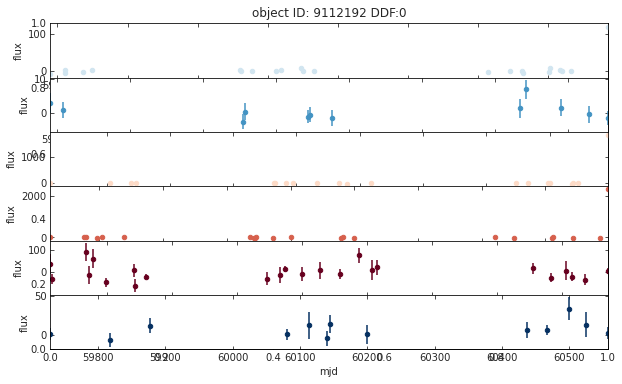

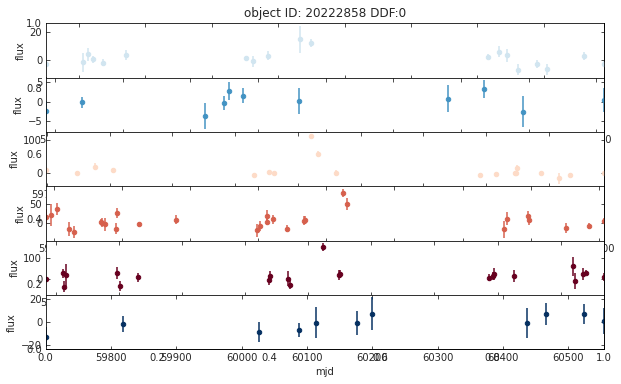

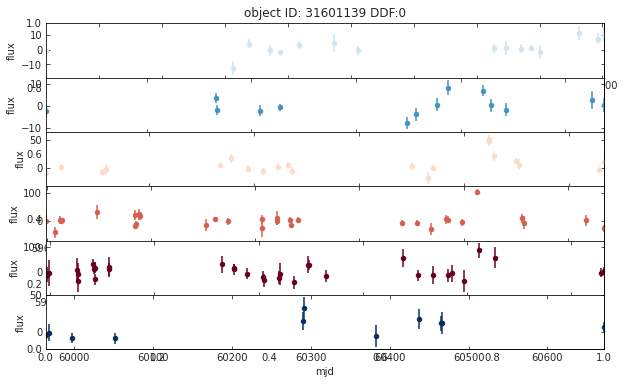

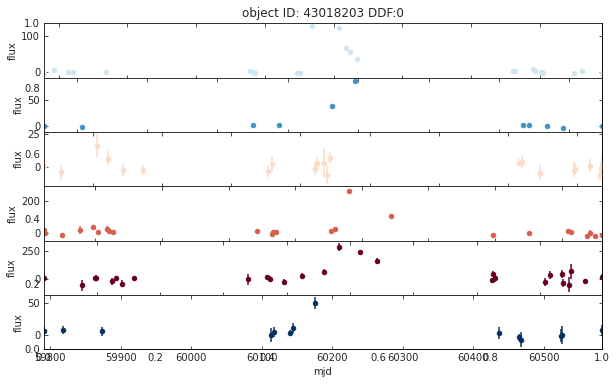

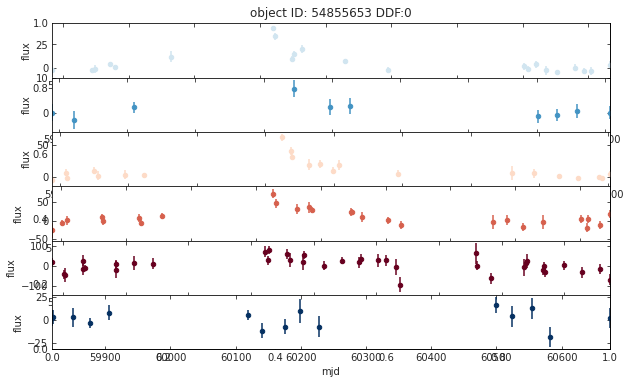

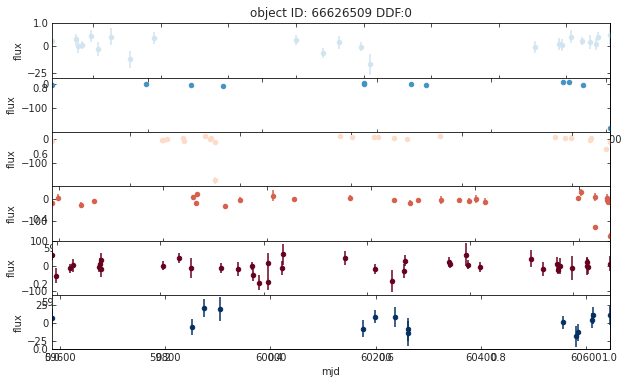

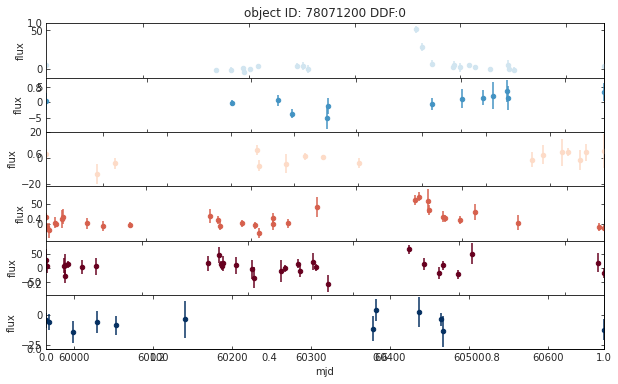

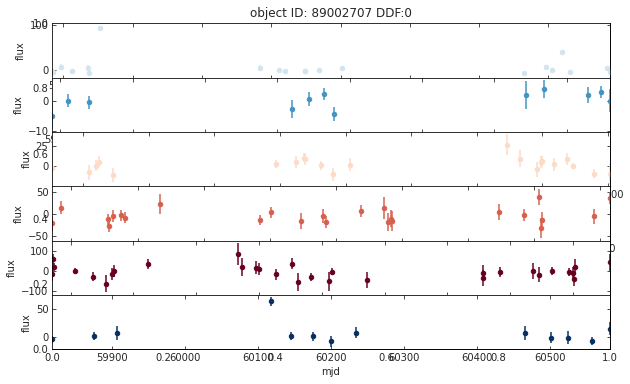

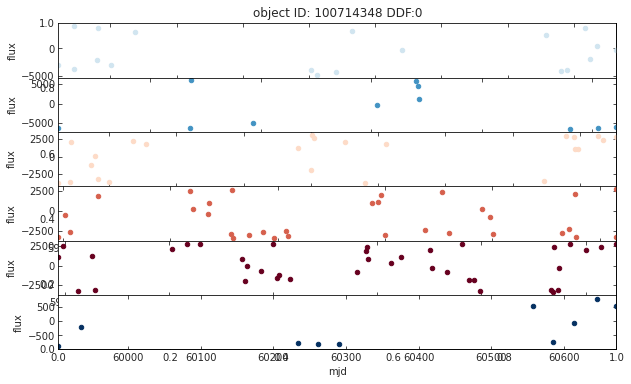

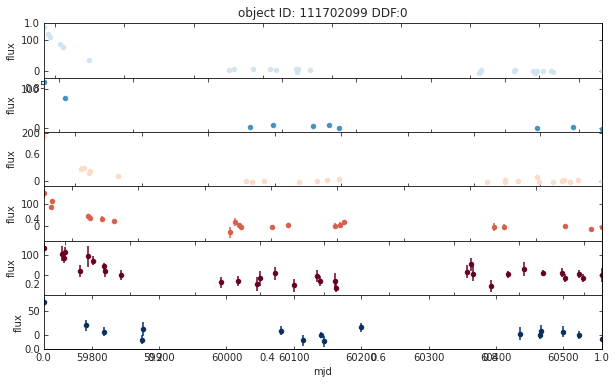

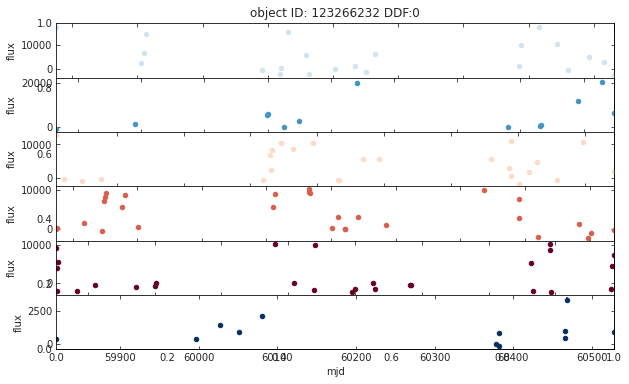

In [101]:
#Plotting every 500th object
for obj in objects[::500]:
    fig = plt.figure()
    plt.title("object ID: %d DDF:%d"%(obj, 
            metadata[metadata.object_id == obj].ddf_bool))
    ax = fig.subplots(6,1)
    fig.subplots_adjust(hspace=0)
    
    for i,band in enumerate(bands):
      select = (lcvs.object_id == obj) & (lcvs.passband == band)
      lcvs[select].plot(x="mjd",  y="flux", yerr="flux_err", 
                        ax=ax[i], kind="scatter", 
                        color=plt.cm.RdBu_r(norm_band(band)))

      ax[i].set_xlim(lcvs[select].mjd.min(), lcvs[select].mjd.max())